In [2]:
import datajoint as dj

In [3]:
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'

In [4]:
dj.config.save_local()

In [5]:
schema = dj.Schema('universityofstthomas')

[2023-09-25 21:59:47,976][INFO]: Connecting root@127.0.0.1:3306
[2023-09-25 21:59:48,057][INFO]: Connected root@127.0.0.1:3306


In [6]:
@schema
class Department(dj.Manual):
    definition = """
    dept_id: char(4)
    ---
    dep_name: varchar(10)
    """

In [7]:
@schema
class Student(dj.Manual):
    definition = """
    stud_id :    int
    ---
    first_name :    varchar(20)
    last_name :     varchar(20)
    date_of_birth : DATE
    student_email:  varchar(30)
    -> Department
    """

In [8]:
@schema
class Course(dj.Manual):
    definition = """
    course_id :    smallint unsigned
    ---
    course_name :  varchar(30)
    course_desc :  varchar(60)
    -> Student
    -> Department

"""   

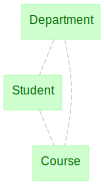

In [9]:
dj.Diagram(schema)

In [10]:
@schema
class StudentGrade(dj.Manual):
    definition = """
        -> Student
        assign_number : smallint
        ---
        grade :  DECIMAL(6, 2)
        -> Course
    """

In [11]:
@schema
class StudentGradesCourse(dj.Manual):
    definition = """
        -> Course
        -> StudentGrade
    """


In [20]:
StudentGradesCourse.drop

<bound method Table.drop of *course_id    *stud_id    *assign_number
+-----------+ +---------+ +------------+

 (Total: 0)
>

In [12]:
@schema
class BostonMarathonChampion(dj.Manual):
    definition = """
     marathon_id:     int
    ---
    marathon_name : varchar(30)
    gender :        enum('MEN','WOMEN')
    nationality :   varchar(30)
    year :    YEAR
    """

In [13]:
@schema
class USState(dj.Manual):
    definition = """
    state_id :         smallint
    ---
    state_capitals : varchar(20)
    state_birds :    varchar(20)
    state_flowers :  varchar(20)
    """

In [14]:
@schema
class HTMLColors(dj.Manual):
    definition = """
    htmlcolor_name :   varchar(10)
    ---
    red_value :        smallint
    green_value :      smallint
    blue_value :       smallint
    """

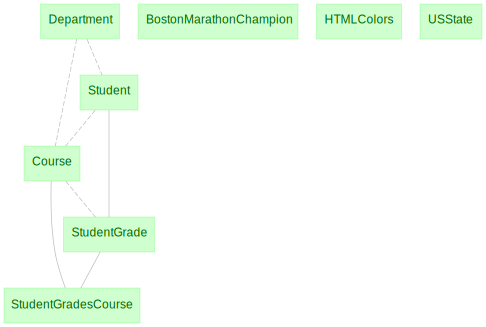

In [19]:
dj.Diagram(schema)